## Complexity Matching

In other sections of this tutorial, like [DFA](dfaAnalysis.ipynb) and [Windowed DFA](dfaWindowed.ipynb), we learnt how to run DFA. Notably, fractal scaling in human behavior tends to match that of an interacting system. This phenomenon, termed complexity matching, can index the convergence of behaviour at a global (i.e., non-local) level. 

There are several approaches to computing complexity matching:
- Correlating 𝛼 across the sample: Traditionally, a correlation between the overall 𝛼 values within a sample is used to calculate complexity matching. 
- Difference in 𝛼 values: Some work has quantified complexity matching as the absolute difference between two 𝛼 values, providing an intuitive index of matching.
- Cross correlation using windowed DFA 𝛼 values: More recently, researchers have employed cross-correlation analysis using 𝛼 values from [Windowed DFA](dfaWindowed.ipynb).
- Detrended cross correlation anaylsis (DCCA): This is a bivariate generalisation of DFA that is designed to detect power-law cross-correlations, in turn quantifying complexity matching. 

In this section, we'll practice performing the first three.

#### Let's Practice Running Complexity Matching

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run our analyses, and create visualisations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis.


In [1]:
import os
import pandas as pd
import numpy as np
from utils.plot_utils import plot_cm_cross_cor

Now that all the utilities are loaded, it's time to capture complexity matching using some real data — in this case, [postural sway](data/dfa/postureA.txt) from individuals engaged in conversation. This data was also used previously in the [DFA](dfaAnalysis.ipynb) and [windowed DFA](dfaWindowed.ipynb) sections.

#### Running a Correlation

Let's start by running a correlation between 𝛼 values across a sample. In this dataset, participants' postural sway was captured while they were sitting versus standing. Let's compare correlation coefficients (i.e., complexity matching) between sitting and standing, to see whether individuals exhibited higher levels of complexity matching in one condition over the other.

Click the "play" button below to perform the analysis and generate the visualisations.

In [3]:
# First set the directory path for the data
data_directory = "data/cm/"

# Set the file name for the data
file_name = "posture_dataset.txt"
file_path = os.path.join(data_directory, file_name)

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, sep='\t')

    # Group by 'cond' and run correlation between participant 1 ('alpha_P1') and participant 2 ('alpha_P2')
    grouped = data.groupby('cond')
    correlations = {}
    for cond, group in grouped:
        correlation = group['alpha_p1'].corr(group['alpha_p2'])
        correlations[cond] = round(correlation, 2)
        print(f'Correlation between participant 1 and participant 2 for condition {cond}: {correlations[cond]}')

    print('Correlation analysis completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

Loading file: posture_dataset.txt
Correlation between participant 1 and participant 2 for condition 0: 0.08
Correlation between participant 1 and participant 2 for condition 1: 0.28
Correlation analysis completed successfully!


##### Interpreting the Results

If your code ran successfully, you should see the following correlation coefficients for each group:

- Sitting (i.e., condition 0): r = .08
- Standing (i.e., condition 1): r = .28

As we can see, individuals exhibited higher levels of complexity matching when standing as opposed to sitting.

#### Computing a Difference Score

Let's compare this to taking a difference score between 𝛼 values:

In [6]:
# First set the directory path for the data
data_directory = "data/cm/"

# Set the file name for the data
file_name = "posture_dataset.txt"
file_path = os.path.join(data_directory, file_name)

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, sep='\t')

    # Group by 'cond' and calculate the absolute difference between 'alpha_p1' and 'alpha_p2'
    data['alpha_diff'] = (data['alpha_p1'] - data['alpha_p2']).abs()
    grouped = data.groupby('cond')
    
    # Compare the absolute differences across conditions
    for cond, group in grouped:
        mean_diff = round(group['alpha_diff'].mean(), 3)
        print(f'Mean absolute difference between participant 1 and participant 2 for condition {cond}: {mean_diff}')

    print('Difference score analysis completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

Loading file: posture_dataset.txt
Mean absolute difference between participant 1 and participant 2 for condition 0: 0.075
Mean absolute difference between participant 1 and participant 2 for condition 1: 0.079
Difference score analysis completed successfully!


##### Interpreting the Results

If your code ran successfully, you should see the following difference scores for each group:

- Sitting (i.e., condition 0): .075
- Standing (i.e., condition 1): .079

Here we can see that the absolute difference in 𝛼 values was actually smaller for individuals when they were sitting versus standing. This likely reflects the fact that their posture was already constrained by sitting, moving their 𝛼 closer together as a function of the physical constraints.

#### Running Cross-Correlation

Now let's run a cross-correlation on [windowed DFA](dfaWindowed.ipynb) data from the same sample:

Loading file: posture_dataset.txt


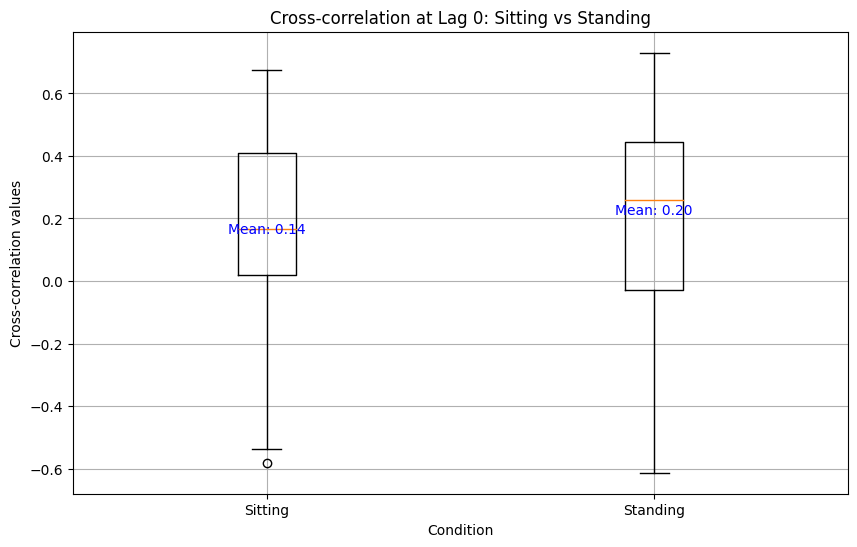

Cross-correlation analysis at lag 0 and box plot completed successfully!


In [7]:
# First set the directory path for the data
data_directory = "data/cm/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/dfa"
save_image = True

# Set the file name for the data
file_name = "posture_dataset.txt"
file_path = os.path.join(data_directory, file_name)

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, sep='\t')

    # Group by 'pair' and 'cond' and run cross-correlation between 'alpha_p1' and 'alpha_p2'
    grouped = data.groupby(['pair', 'cond'])
    
    cross_corr_values = {'cond_0': [], 'cond_1': []}

    # Run cross-correlation and collect values for cond 0 and 1 at lag 0
    for (pair, cond), group in grouped:
        alpha_p1 = group['alpha_p1']
        alpha_p2 = group['alpha_p2']

        # Run cross-correlation
        cross_corr = np.correlate(alpha_p1 - alpha_p1.mean(), alpha_p2 - alpha_p2.mean(), mode='full')
        cross_corr /= (len(alpha_p1) * alpha_p1.std() * alpha_p2.std())
        lags = np.arange(-len(alpha_p1) + 1, len(alpha_p1))

        # Collect cross-correlation value at lag 0
        lag_0_index = np.where(lags == 0)[0][0]
        lag_0_value = cross_corr[lag_0_index]

        if cond == 0:
            cross_corr_values['cond_0'].append(lag_0_value)
        elif cond == 1:
            cross_corr_values['cond_1'].append(lag_0_value)

    # Call the plotting function from plot_utils to create a box plot
    plot_cm_cross_cor(cross_corr_values, save_image, 'images/dfa/boxplot_cross_corr_cond_0_vs_1_lag_0.png')

    print('Cross-correlation analysis at lag 0 and box plot completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

##### Interpreting the Results

If your code ran successfully, you should see the following correlation coefficients (at lag = 0) for each group:

- Sitting (i.e., condition 0): r = .14
- Standing (i.e., condition 1): r = .20

As with the first correlation we conducted, individuals exhibited higher levels of complexity matching when standing as opposed to sitting.

Here we've focused on lag zero, because this is where the maximum correlation primarily occurred in this dataset.


#### Going Further

To expand your understanding of complexity matching, you can try the following:

1. Analyse other time series: Repeat the analyses above with other types of continuous data.
2. Examine other cross-correlation lags: In the postural sway data above, the maximum correlation occurred at lag zero. Try applying this analysis to time series where higher levels of complexity matching might be expected at other lags (e.g., datasets with a leader/follower dynamic).